In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('uboats.csv')

df

,Name,Year,Type,Notable Commanders,Warships_sunk_n_total_loss_No,Warships_sunk_n_total_loss_Tons-n-GRT,Warships_Damaged_No,Warships_Damaged_Tons-n-GRT,Merchant_Ships_sunk_No,Merchant_Ships_sunk_GRT,...,Notes,URL,Commissioned,Patrols,Patrols_Count,Wolfpacks,Wolfpacks_Count,Flotilla,Flotilla_Count,Last_Flotilla
0,U-1,1935,IIA,Klaus Ewerth,0,0,0,0,0,0,...,Struck a mine,https://en.wikipedia.org/wiki/German_submarine...,1935-06-29,2 patrols:1st patrol:15 – 29 March 19402nd pat...,2,NaN,0,"{'U-boat School Flotilla': ['1 July 1935 ', ' ...",1,U-boat School Flotilla
1,U-2,1935,IIA,"Hans Heidtmann,Heinrich Liebe,Helmut Rosenbaum...",0,0,0,0,0,0,...,Training boat,https://en.wikipedia.org/wiki/German_submarine...,1935-07-25,2 patrols:1st patrol:15 – 29 March 19402nd pat...,2,NaN,0,"{'U-boat School Flotilla': ['1 July 1935 ', ' ...",2,21st U-boat Flotilla
2,U-3,1935,IIA,"Joachim Schepke,Otto von Bülow,Hans-Hartwig Tr...",0,0,0,0,2,"2,348",...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1935-09-06,5 patrols:1st patrol:4 – 8 September 19392nd p...,5,NaN,0,"{'U-boat School Flotilla': ['1 August 1935 ', ...",2,21st U-boat Flotilla
3,U-4,1935,IIA,Heinz-Otto Schultze,1,"1,090",0,0,3,"5,133",...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1935-08-17,4 patrols:1st patrol:4 – 14 September 19392nd ...,4,NaN,0,"{'U-boat School Flotilla': ['1 August 1935 ', ...",2,21st U-boat Flotilla
4,U-5,1935,IIA,Heinrich Lehmann-Willenbrock,0,0,0,0,0,0,...,Accident,https://en.wikipedia.org/wiki/German_submarine...,1935-08-31,2 patrols:1st patrol:24 August – 8 September 1...,2,NaN,0,{'U-boat School Flotilla': ['1 September 1935 ...,2,21st U-boat Flotilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,U-4707,1945,XXIII,NaN,0,0,0,0,0,0,...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1945-02-20,NaN,0,NaN,0,"{'5th U-boat Flotilla': ['20 February ', ' 5 M...",1,5th U-boat Flotilla
1149,U-4709,1945,XXIII,NaN,0,0,0,0,0,0,...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1945-03-03,NaN,0,NaN,0,"{'5th U-boat Flotilla': ['3 March ', ' 4 May 1...",1,5th U-boat Flotilla
1150,U-4710,1945,XXIII,Ludwig von Friedeburg,0,0,0,0,0,0,...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1945-05-01,NaN,0,NaN,0,"{'5th U-boat Flotilla': ['1 ', ' 5 May 1945']}",1,5th U-boat Flotilla
1151,U-4711,1945,XXIII,NaN,0,0,0,0,0,0,...,NaN,https://en.wikipedia.org/wiki/German_submarine...,1945-03-21,NaN,0,NaN,0,"{'5th U-boat Flotilla': ['21 March ', ' 4 May ...",1,5th U-boat Flotilla


In [24]:
notable_commanders_index = df.columns.get_loc('Notable Commanders')
df.insert(loc=notable_commanders_index + 1, column = 'Commander Status', 
          value = df['Notable Commanders'].apply(lambda x: 0 if pd.isna(x) else 1))

In [25]:
warship_sunk_n_index = df.columns.get_loc('Warships_sunk_n_total_loss_No')
df.insert(loc = warship_sunk_n_index + 1, column = 'Warship Sunk', 
          value = df['Warships_sunk_n_total_loss_No'].apply(lambda x: 0 if x == 0 else 1))


In [26]:
merchant_damged_n_index = df.columns.get_loc('Merchant_Ships_damaged_No')
df.insert(loc = warship_sunk_n_index + 1, column = 'Merchant Damaged', 
          value = df['Merchant_Ships_damaged_No'].apply(lambda x: 0 if x == 0 else 1))

In [27]:
df.head(1)

,Name,Year,Type,Notable Commanders,Commander Status,Warships_sunk_n_total_loss_No,Merchant Damaged,Warship Sunk,Warships_sunk_n_total_loss_Tons-n-GRT,Warships_Damaged_No,...,Notes,URL,Commissioned,Patrols,Patrols_Count,Wolfpacks,Wolfpacks_Count,Flotilla,Flotilla_Count,Last_Flotilla
0,U-1,1935,IIA,Klaus Ewerth,1,0,0,0,0,0,...,Struck a mine,https://en.wikipedia.org/wiki/German_submarine...,1935-06-29,2 patrols:1st patrol:15 – 29 March 19402nd pat...,2,NaN,0,"{'U-boat School Flotilla': ['1 July 1935 ', ' ...",1,U-boat School Flotilla


Pivot Counts DataFrame:
Warship Sunk        0       1    
Merchant Damaged    0   1   0   1
Commander Status                 
0                 759  64  84  28
1                  74  47  36  61

Inner Values:
[759  84  64  28  74  36  47  61]

Shape of inner_vals: (8,)

Type of inner_vals: <class 'numpy.ndarray'>

Inner Labels:
['Warship Sunk=0, Merchant Damaged=0', 'Warship Sunk=0, Merchant Damaged=1', 'Warship Sunk=1, Merchant Damaged=0', 'Warship Sunk=1, Merchant Damaged=1']

Length of inner_vals: 8
Length of inner_labels: 4


ValueError: Length of inner_vals and inner_labels must match

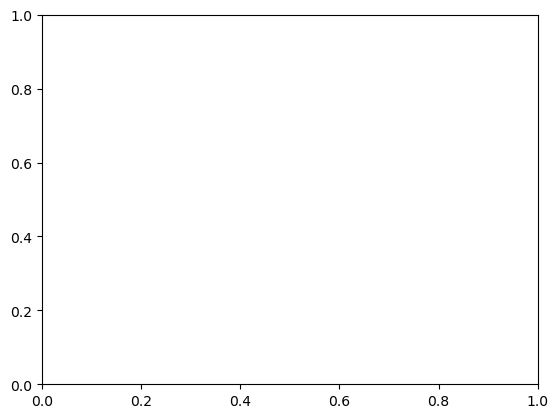

In [30]:
# Calculate counts
counts = df.groupby(['Commander Status', 'Warship Sunk', 'Merchant Damaged']).size().reset_index(name='count')

# Pivot counts
pivot_counts = counts.pivot_table(index='Commander Status', columns=['Warship Sunk', 'Merchant Damaged'], values='count', aggfunc='sum').fillna(0)

# Display pivot_counts for inspection
print("Pivot Counts DataFrame:")
print(pivot_counts)

# Create nested pie chart
fig, ax = plt.subplots()

size = 0.3
vals = pivot_counts.values

tab20c = plt.cm.tab20(np.linspace(0, 1, 20))
outer_colors = [tab20c[i] for i in [0, 4, 8]]
inner_colors = [tab20c[i] for i in [1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

outer_labels = pivot_counts.index.astype(str)

# Correctly unpack the MultiIndex for inner labels
inner_labels = [f"Warship Sunk={ws}, Merchant Damaged={md}" for ws, md in pivot_counts.stack().index]

# Ensure inner_vals is one-dimensional by flattening
inner_vals = pivot_counts.stack().values.flatten()

# Print intermediate results for inspection
print("\nInner Values:")
print(inner_vals)
print("\nShape of inner_vals:", inner_vals.shape)
print("\nType of inner_vals:", type(inner_vals))
print("\nInner Labels:")
print(inner_labels)

# Verify the lengths of inner_vals and inner_labels
print(f"\nLength of inner_vals: {len(inner_vals)}")
print(f"Length of inner_labels: {len(inner_labels)}")

# Check if lengths match
if len(inner_vals) != len(inner_labels):
    raise ValueError("Length of inner_vals and inner_labels must match")

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels=outer_labels,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')

ax.pie(inner_vals, radius=1-size, colors=inner_colors[:len(inner_vals)], labels=inner_labels[:len(inner_vals)],
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', textprops={'fontsize': 6})

ax.set(aspect="equal", title='Nested Pie Chart')
plt.show()

In [13]:
fate_event_counts = df['Fate_Event'].value_counts().reset_index()
fate_event_counts.columns = ['Fate_Event', 'Count']

# Get the count of each category
counts = df['Fate_Event'].value_counts()

# Select the categories with a count of 1
other_categories = counts[counts == 1].index

# Combine these categories into a new category 'Other'
df['Fate_Event'] = df['Fate_Event'].apply(lambda x: 'Other' if x in other_categories else x)

# Get the new count of each category
new_counts = df['Fate_Event'].value_counts().reset_index()
new_counts.columns = ['Fate_Event', 'Count']

fate_event_counts

new_counts

,Fate_Event,Count
0,Sunk,650
1,Scuttled,268
2,Surrendered,149
3,Missing,45
4,Stricken,15
5,Other,8
6,Captured,6
7,Scrapped,5
8,Broken up,4
9,Buried,3


Text(0.5, 1.0, 'Percent of event type')

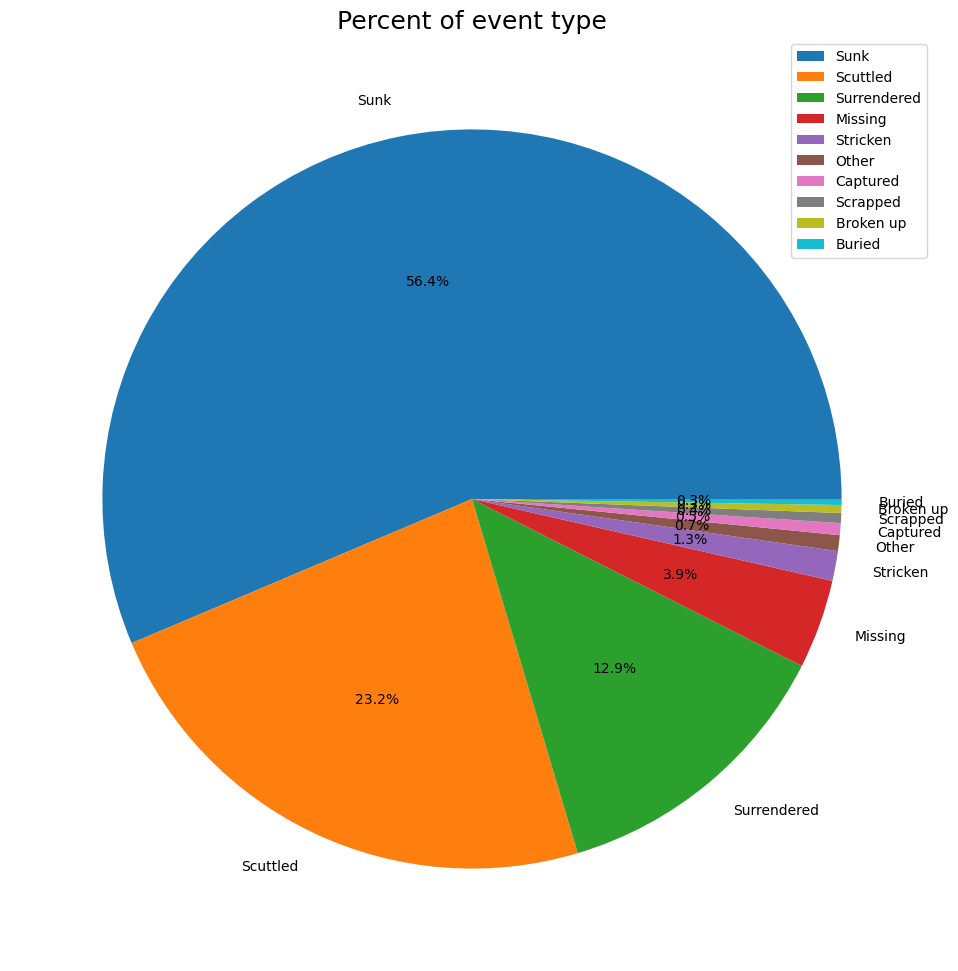

In [14]:
plt.figure(figsize = (12, 12))
plt.pie(x = new_counts['Count'], labels = new_counts['Fate_Event'], autopct='%1.1f%%')
plt.legend(new_counts['Fate_Event'])
plt.title('Percent of event type', fontsize = 18)